# **Final Project**

- **<font color = maroon size = "4">Marketing Analytics DAB 303</font>**
- **<font color = maroon size = "4">Prepared by - Hardeep Kaur, Yash Agrawal, Kshitij Segal</font>**
- **<font color = maroon size = "4">Under the guidance of - Professor Manjari Maheshwari and Professor Muhammad Anwar Shahid</font>**

## **Introduction**
**<font size="4">_In this project, we are working on Instacart dataset. As per the description shared on [Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis/overview), Instacart open sourced this data - see their blog post on [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)._</font>**    

**<font size="4">_Our objective is to analyze this dataset and to provide insights in the form of:_</font>**     

**<font size="4">1. Exploratory Data Analysis</font>**    
**<font size="4">2. Customer Segmentation on Instacart dataset</font>**     
**<font size="4">3. Classification Model to Predict whether a customer will reorder or not</font>**     

## **Data Dictionary**
**<font size="3.5">Each entity (customer, product, order, aisle, etc.) has an associated unique id.</font>**     
- aisles.csv
- departments.csv
- order_products__prior.csv
- orders.csv
- products.csv

**Detailed Description:** https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b



## **Tasks**
**<font size="4">In this notebook, we are performing Exploratory Data Analysis on InstaCart dataset.</font>**   

In [19]:
import pandas as pd #For dataframe manipulations
import numpy as np #For numerical calculations
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For visualization
from functools import partial # to reduce df memory consumption by applying to_numeric
color = sns.color_palette() # adjusting plotting style
%matplotlib inline

#To ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
orders = pd.read_csv("orders.csv") #Read Orders dataset
orders.head() #View dataset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
aisles = pd.read_csv("aisles.csv") #To Read Aisles dataset
aisles.head() #View dataset

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
dept = pd.read_csv("departments.csv") #To read departments dataset
dept.head() #View dataset

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products = pd.read_csv("products.csv") #To read products dataset
products.head() #View dataset

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products = pd.read_csv("order_products__prior.csv") #To order_products dataset
order_products.head() #View dataset

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
#View shapes of the dataframes 

print(orders.shape)
print(aisles.shape)
print(dept.shape)
print(products.shape)
print(order_products.shape)

(3421083, 7)
(134, 2)
(21, 2)
(49688, 4)
(32434489, 4)


In [8]:
#Evaluate the NaN data in all the dataframes 


print(f"Table Orders:\n{orders.isna().sum()}\n")
print(f"Table Aisles:\n{aisles.isna().sum()}\n")
print(f"Table Department:\n{dept.isna().sum()}\n")
print(f"Table Products:\n{products.isna().sum()}\n")
print(f"Table Order_Products:\n{order_products.isna().sum()}\n")

Table Orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Table Aisles:
aisle_id    0
aisle       0
dtype: int64

Table Department:
department_id    0
department       0
dtype: int64

Table Products:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Table Order_Products:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



In [9]:
#Merging all the dataframes into one

temp_1 = pd.merge(order_products, products, on=['product_id', 'product_id'])
temp_2 = pd.merge(temp_1, dept, on=['department_id','department_id'])
temp_3 = pd.merge(temp_2, aisles, on=['aisle_id','aisle_id'])
df = pd.merge(temp_3, orders, on=['order_id','order_id'])

In [10]:
#Sort the dataframe in ascending order

df.sort_values(by=['user_id', 'order_id', 'product_id'], ascending=True, inplace=True)
df.reset_index(inplace=True) #Reset indices
df.drop(['index'], axis=1, inplace=True) #Drop unwanted index column
df.head() #View dataset

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0
2,431534,10326,5,0,Organic Fuji Apples,24,4,produce,fresh fruits,1,prior,5,4,15,28.0
3,431534,12427,2,1,Original Beef Jerky,23,19,snacks,popcorn jerky,1,prior,5,4,15,28.0
4,431534,13176,8,1,Bag of Organic Bananas,24,4,produce,fresh fruits,1,prior,5,4,15,28.0


In [11]:
df.shape #View shape of teh dataframe

(32434489, 15)

In [12]:
#Evaluate NaN values
df.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

**<font size="4">Since, we have huge amount of data, we can drop the rows which have null values in them.</font>**

In [13]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [14]:
#View the shape of dataframe
df.shape

(30356421, 15)

In [15]:
#View the dataset
df.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,431534,196,1,1,Soda,77,7,beverages,soft drinks,1,prior,5,4,15,28.0
1,431534,10258,3,1,Pistachios,117,19,snacks,nuts seeds dried fruit,1,prior,5,4,15,28.0


In [16]:
df.info() #Display the information related to the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30356421 entries, 0 to 30356420
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.4+ GB


In [18]:
import nltk # for text processing and manipulations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from functools import partial # to reduce df memory consumption by applying to_numeric
color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings
%matplotlib inline

## EDA 1

<AxesSubplot:title={'center':'Aisles: Product #'}, xlabel='aisle'>

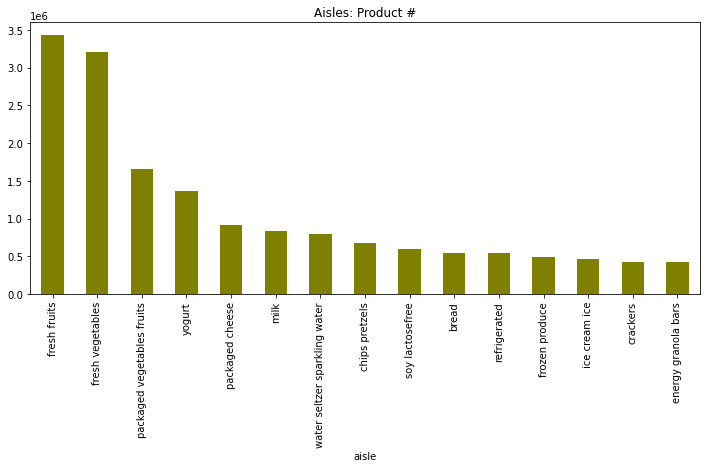

In [20]:
# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
df.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar',  color=['olive'],
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

## Analysis
- Having a look at the aisle information we can conclude that most of the consumers purchase fresh fruits and fresh vegetables at the store. 
- These are the items (Fresh food items) have a limited shelf life and needs to be fresh at the time the customer approaches for buying and thus since most of the consumers visits our marts on weekends, we see the restocking of these items easily surpassing rest of the food items. 
- We have also discovered that our household distribution near our mart comprises more of family and less of bachelors. The ready made food nutritious food item like granola bars and refrigrated products see limited demand as compared to other food items. 

## EDA 2

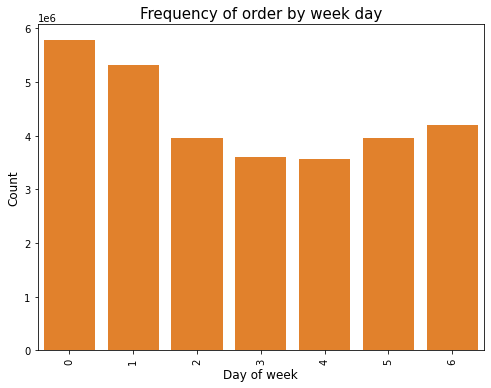

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="order_dow", data=df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

## Analysis 
- This chart highlights the distribution of orders with respect to days in a week. In our chart we see that weekends (Saturday and sunday with sunday being the highest) see an increase in the order. However, from monday we see a declining trend in the frequency of the number of order by week. 
- We have also analysed this by the fact of the distribution of population in our locality and came to know that most of the families in our neighbourhood comprises of working population who gets their work day off on weekends and as a result the order is more especially on sunday. 


## EDA 3

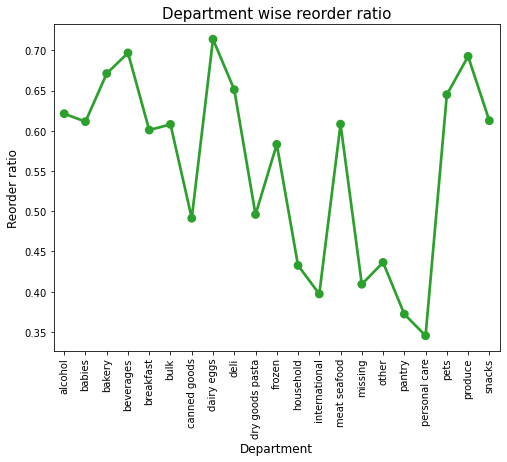

In [22]:
grouped_df = df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(8,6))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## Analysis
- This is the chart that highlights the department wise reorder ratio which in short explains about the gap between two orders (Primary order and secondary order) of a particular product of a department. 
- By having a look at the chart we come to know that regular consumable products like dairy eggs and produce have the highest reorder ratio. However, the items of personal care are having the least reorder ratio and they are being brought only when it is being needed. 
- We have also discovered the fact that many of our consumers prefer international foods and the reorder ratio of these foods are not the least and they have surpassed our personal care as well on their ratio. 

## EDA 4

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Across Hour Of The Day')]

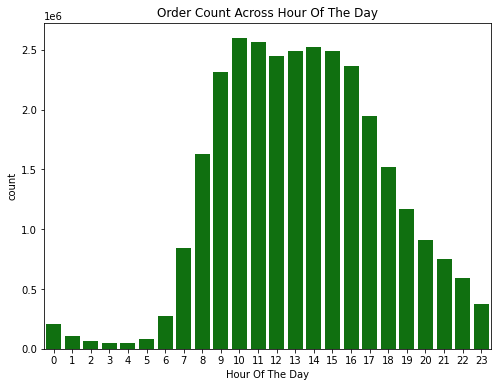

In [23]:
fig,ax = plt.subplots()
fig.set_size_inches(8,6)
sns.countplot(data=df,x="order_hour_of_day",ax=ax,color="green")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")

## Analysis
- This chart shows the count of orders by the hour of the day. Note: The hours we took for our analysis is in 24 hours format and the chart revels the fact that when our store obtain most of the orders from our consumers.
- According to the chart, we came to conclude that most of the consumers orders in the first half of the day with the maximum order at 10:00 in the morning with equally high orders between 10:00am- 3:00pm. However, as evening approaches, we see a decline in the order. 
- Our marketing campaigns also targeted to launch early in the morning rather than midnight so that we can attract maximum consumers under our campaign.  

## EDA 5

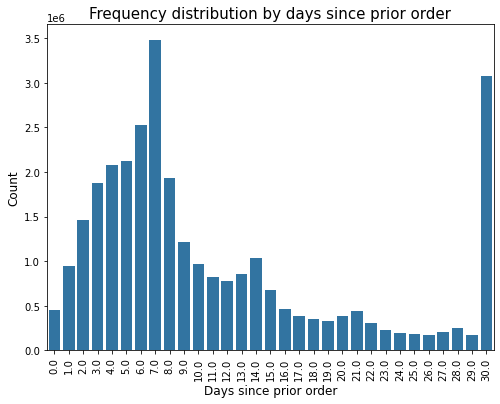

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x="days_since_prior_order", data=df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

## Analysis
- This is the chart that revels the fact about the frequency distribution by days since the prior order and it explained us the phenomenon that most of the orders are being repeated within the 7 days of its first order. This has also revealed the fact that most of the consumers follow a time frame to order the same products every week. However, if the order does not gets repeated in a week, then the consumers prefer to order the same product after 30 days. Thus, our consumers prefer a cyclical trend to order their products either weekly or monthly. 
- This disciplined approach of our consumers is high for regular consumable products and least for speciality products.  

## EDA 6

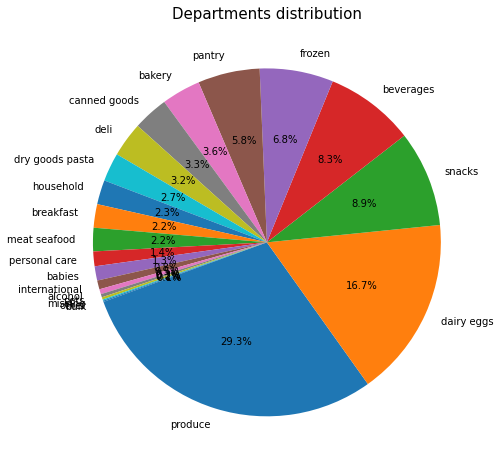

In [25]:
plt.figure(figsize=(10,8))
temp_series = df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

## Analysis
- This chart revels the important disclosure about the department which constitutes the maximum share at our store. With the chart it is obvious that most of the shelf is being occupied by either "produce" or "dairy eggs".
- We see a limited shelfs for non-consumables speciality products and see more shelfs for food items with few people purchasing nutritious products and heavy inclination is seen towards dairy products. 
- Consumers in our locality prefer beverages and energy drinks but we see very less demands for alcoholic beverages. 
- With more working population in our neighborhood, we see more people buying breakfast and food products and very less consumption for non durable and preferential products (like personal care products). 

## **References**
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://seaborn.pydata.org/
- https://matplotlib.org/tutorials/introductory/pyplot.html